In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#act=pd.read_csv('/content/activity_labels.txt', header=None)

In [ ]:
#act

In [47]:
train_features=pd.read_csv('/content/drive/MyDrive/IML Project/Train/X_train.txt', sep=" ", header=None)
train_output=pd.read_csv('/content/drive/MyDrive/IML Project/Train/y_train.txt',header=None)

In [155]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [159]:
train_output

,0
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


In [9]:
test_output=pd.read_csv('/content/drive/MyDrive/IML Project/Test/y_test.txt',header=None)
test_features=pd.read_csv('/content/drive/MyDrive/IML Project/Test/X_test.txt',sep=" ", header=None)

In [10]:
test_features.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [158]:
test_output

,0
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [48]:
X_train=train_features.values
X_test=test_features.values
y_train=train_output.values.ravel()
y_test=test_output.values.ravel()
activity=train_output.values.ravel()
act1=[1,2,3,4,5,6,7,8,9,10,11,12]

In [13]:
activity

array([5, 5, 5, ..., 2, 2, 2])

In [14]:
activity.shape

(7767,)

In [15]:
train_output.value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
dtype: int64

In [157]:
X_train.shape

(7767, 561)

In [17]:
X_test.shape

(3162, 561)

In [18]:
y_train.shape

(7767,)

In [19]:
y_test.shape

(3162,)

In [ ]:
# correlation_matrix = train_features.corr()
# sns.heatmap(correlation_matrix, annot=True)
# plt.show()

Text(0.5, 1.0, 'tbodyacc-mean 1')

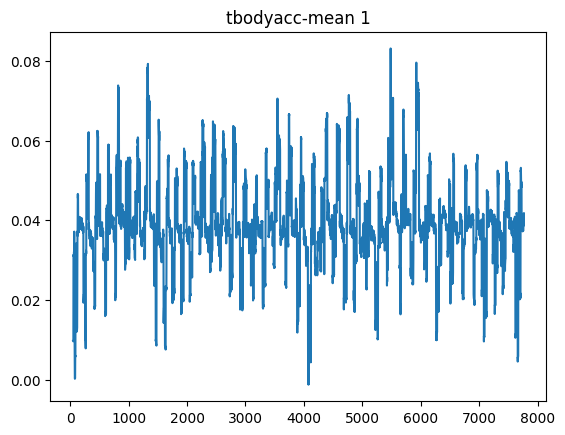

In [20]:
rolling_mean = train_features[0].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-mean 1')


Text(0.5, 1.0, 'tbodyacc-std 1')

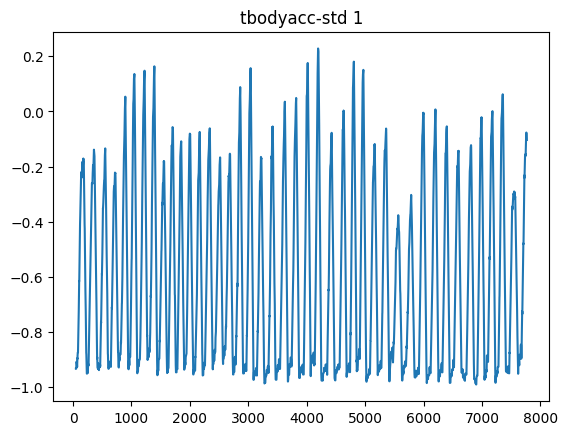

In [21]:
rolling_mean = train_features[3].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-std 1')

Text(0.5, 1.0, 'tbodyacc-mad 1')

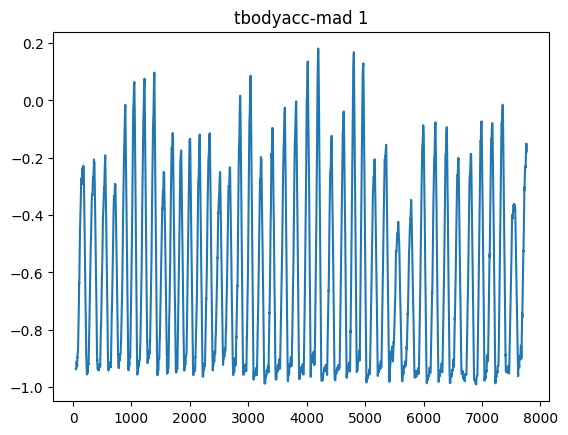

In [22]:
rolling_mean = train_features[6].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-mad 1')

Text(0.5, 1.0, 'tbodyacc-max 1')

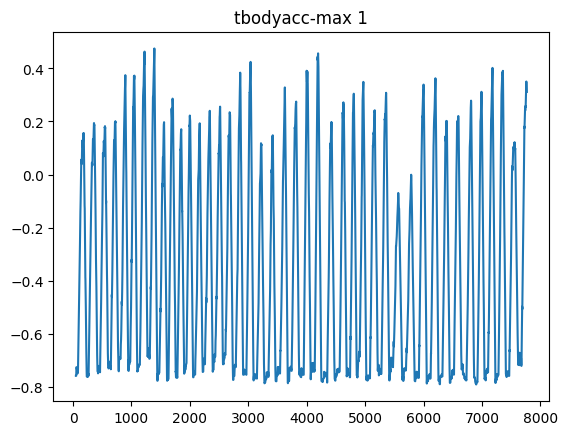

In [23]:
rolling_mean = train_features[9].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-max 1')

Text(0.5, 1.0, 'tbodyacc-min 1')

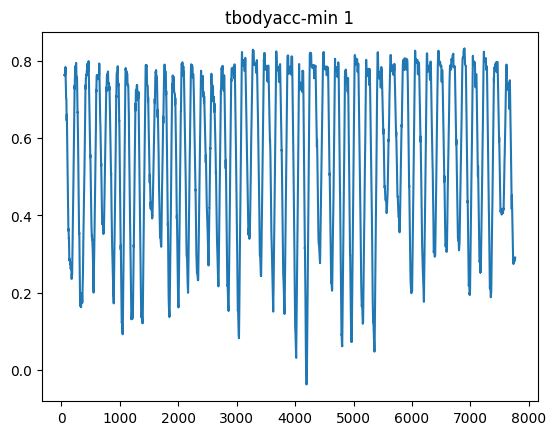

In [24]:
rolling_mean = train_features[12].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-min 1')

Text(0.5, 1.0, 'tbodyacc-SMA 1')

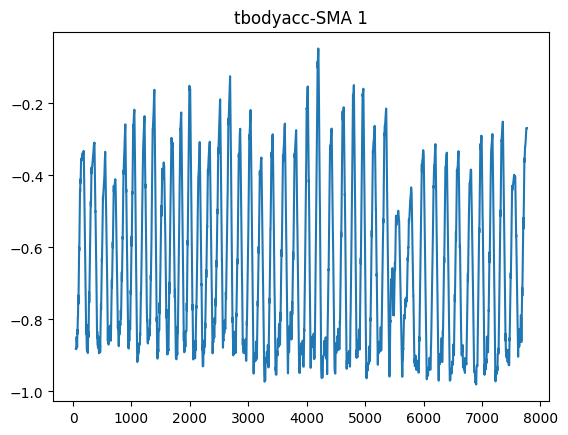

In [25]:
rolling_mean = train_features[15].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-SMA 1')

Text(0.5, 1.0, 'tbodyacc-energy 1')

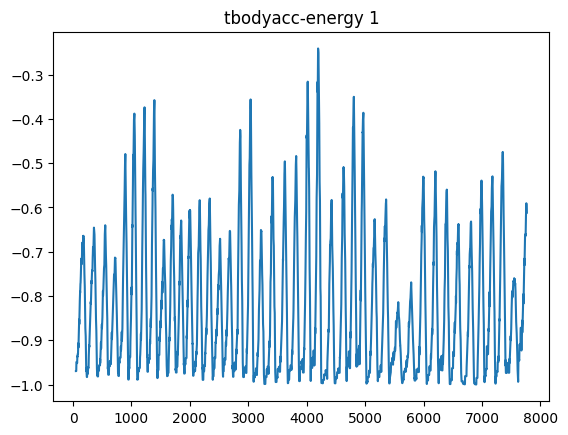

In [26]:
rolling_mean = train_features[16].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-energy 1')

Text(0.5, 1.0, 'tbodyacc-IQR 1')

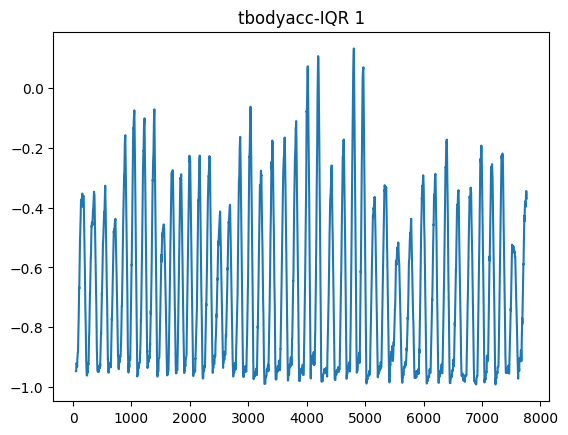

In [27]:
rolling_mean = train_features[19].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-IQR 1')

Text(0.5, 1.0, 'tbodyacc-ropy 1')

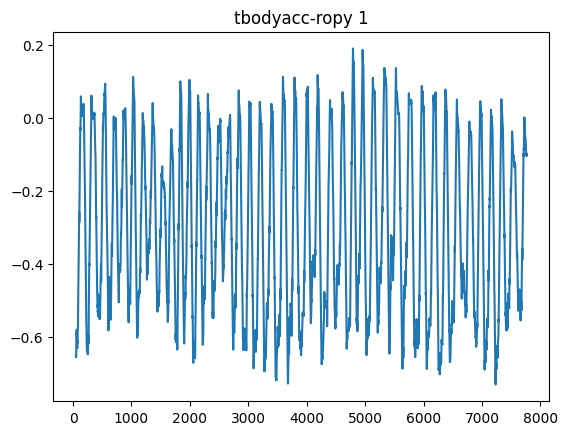

In [28]:
rolling_mean = train_features[22].rolling\
            (50).mean()
rolling_mean.plot()
plt.title('tbodyacc-ropy 1')

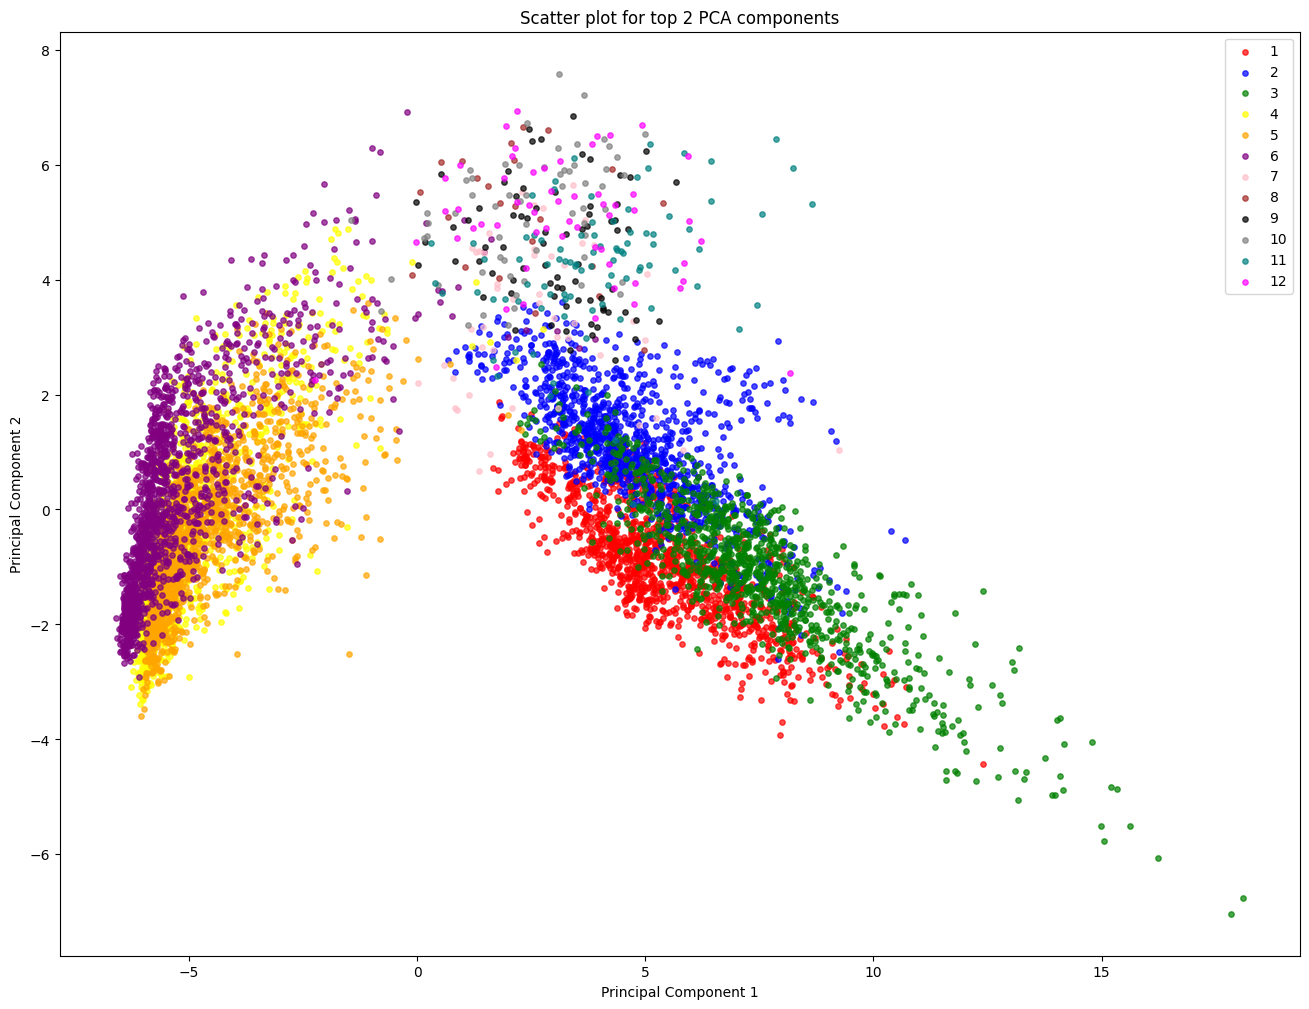

In [31]:
colors = ['white','red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'gray', 'teal','magenta']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(16, 12))

for i in range (1,13):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 PCA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

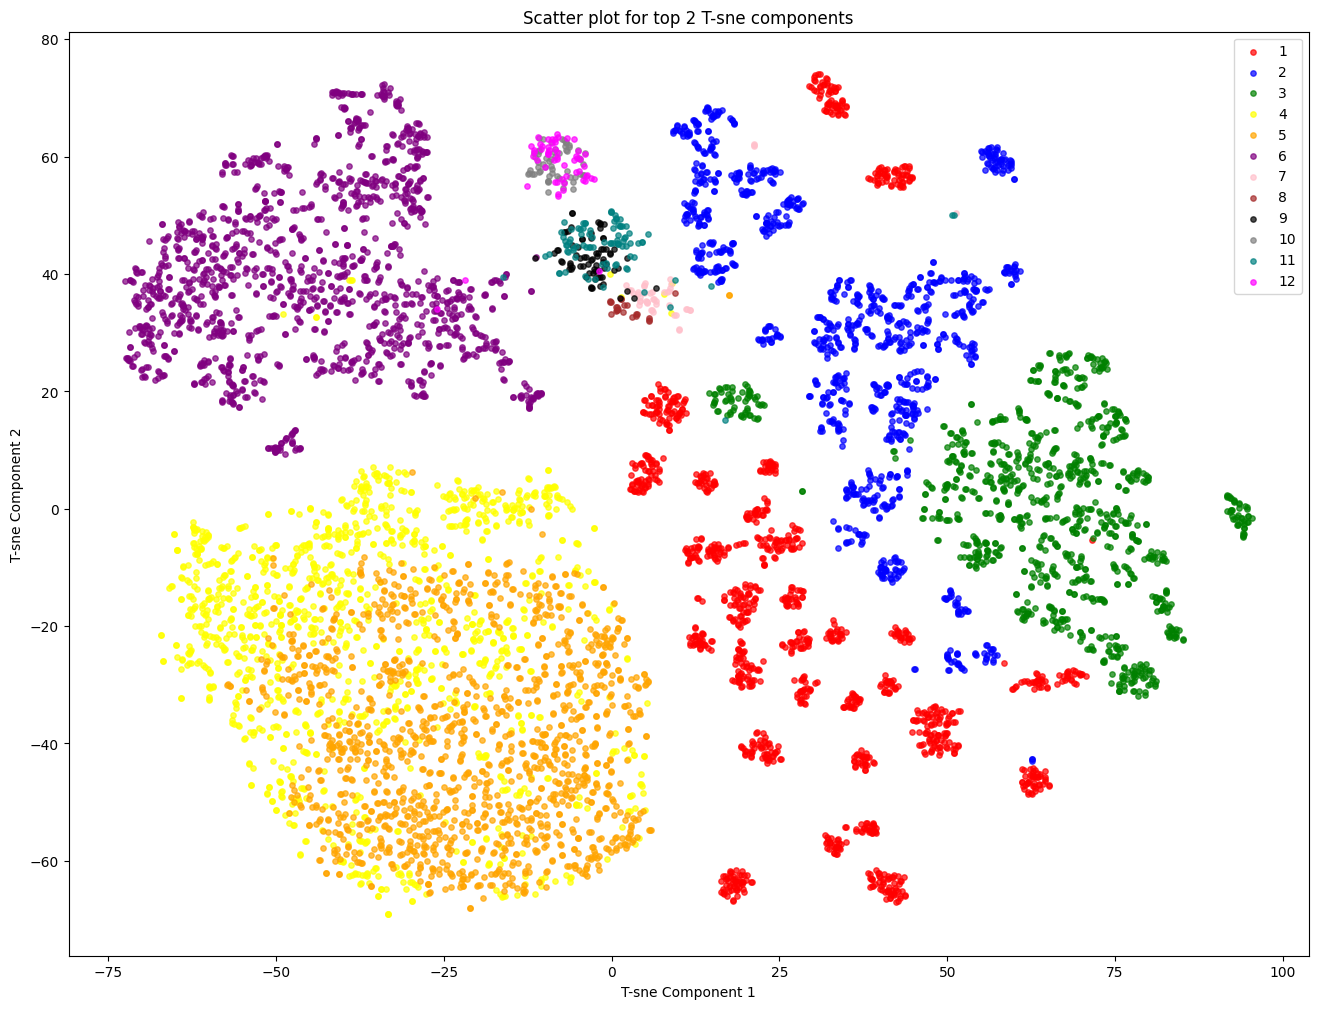

In [33]:
plt.figure(figsize=(16, 12))

for i in range (1,13):
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 T-sne components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('T-sne Component 1')
plt.ylabel('T-sne Component 2')
plt.show()

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=8)
X_lda = lda.fit_transform(X_train, y_train)
X_lda_test = lda.fit_transform(X_test, y_test)

In [35]:
tsne = TSNE(n_components=2)
X_lda_tsne = tsne.fit_transform(X_lda)
X_lda_tsne_test=tsne.fit_transform(X_test,y_test)

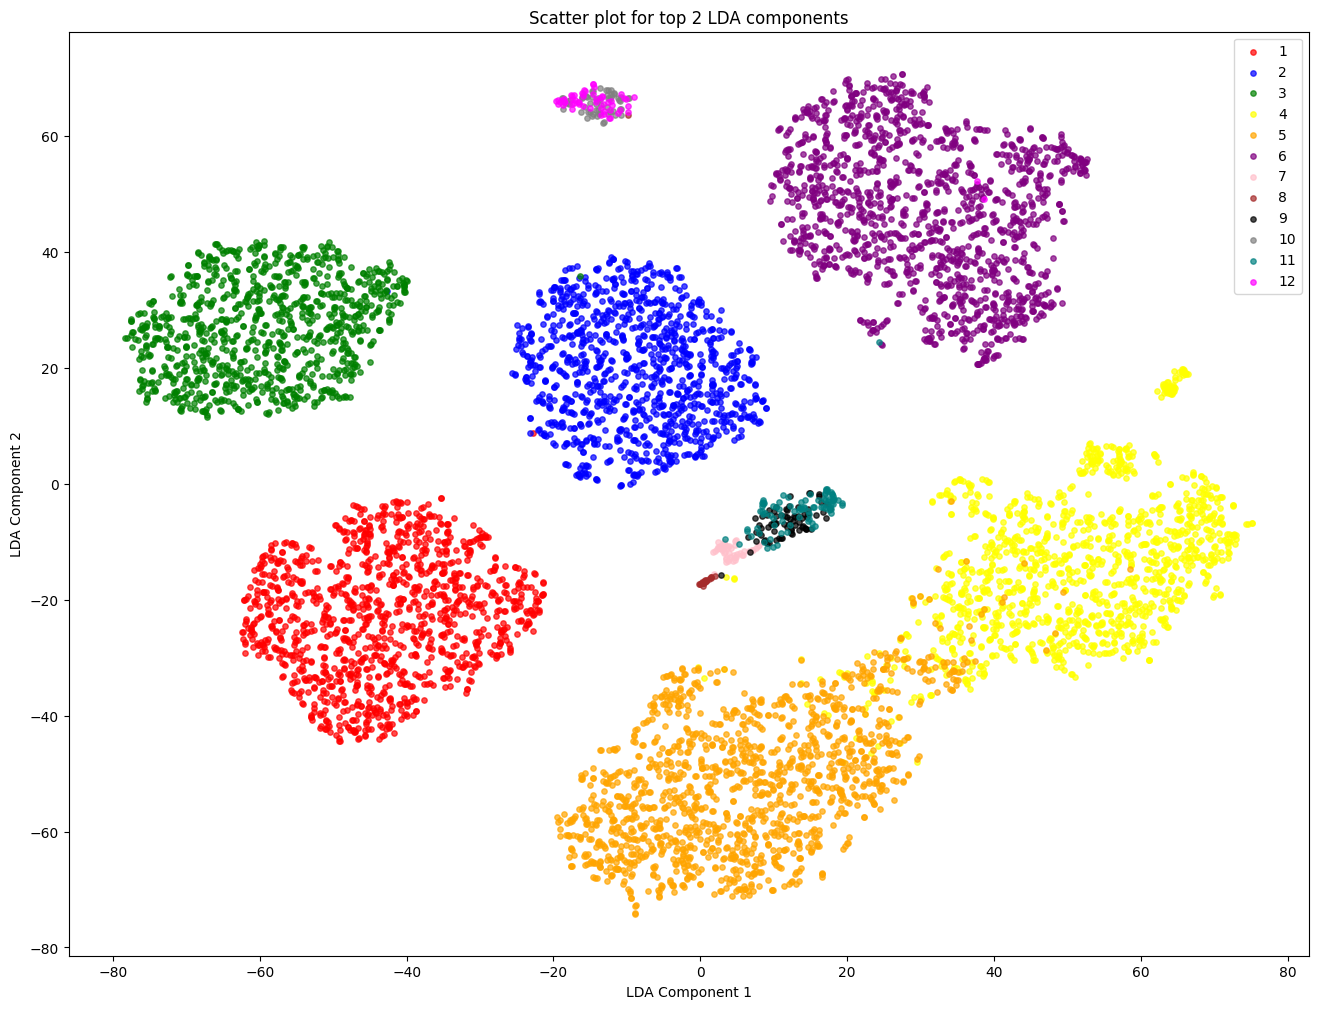

In [36]:
plt.figure(figsize=(16, 12))

for i in range (1,13):
    plt.scatter(X_lda_tsne[y_train == i, 0], X_lda_tsne[y_train == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 LDA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [161]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
X_lda_test = lda.fit_transform(X_test, y_test)

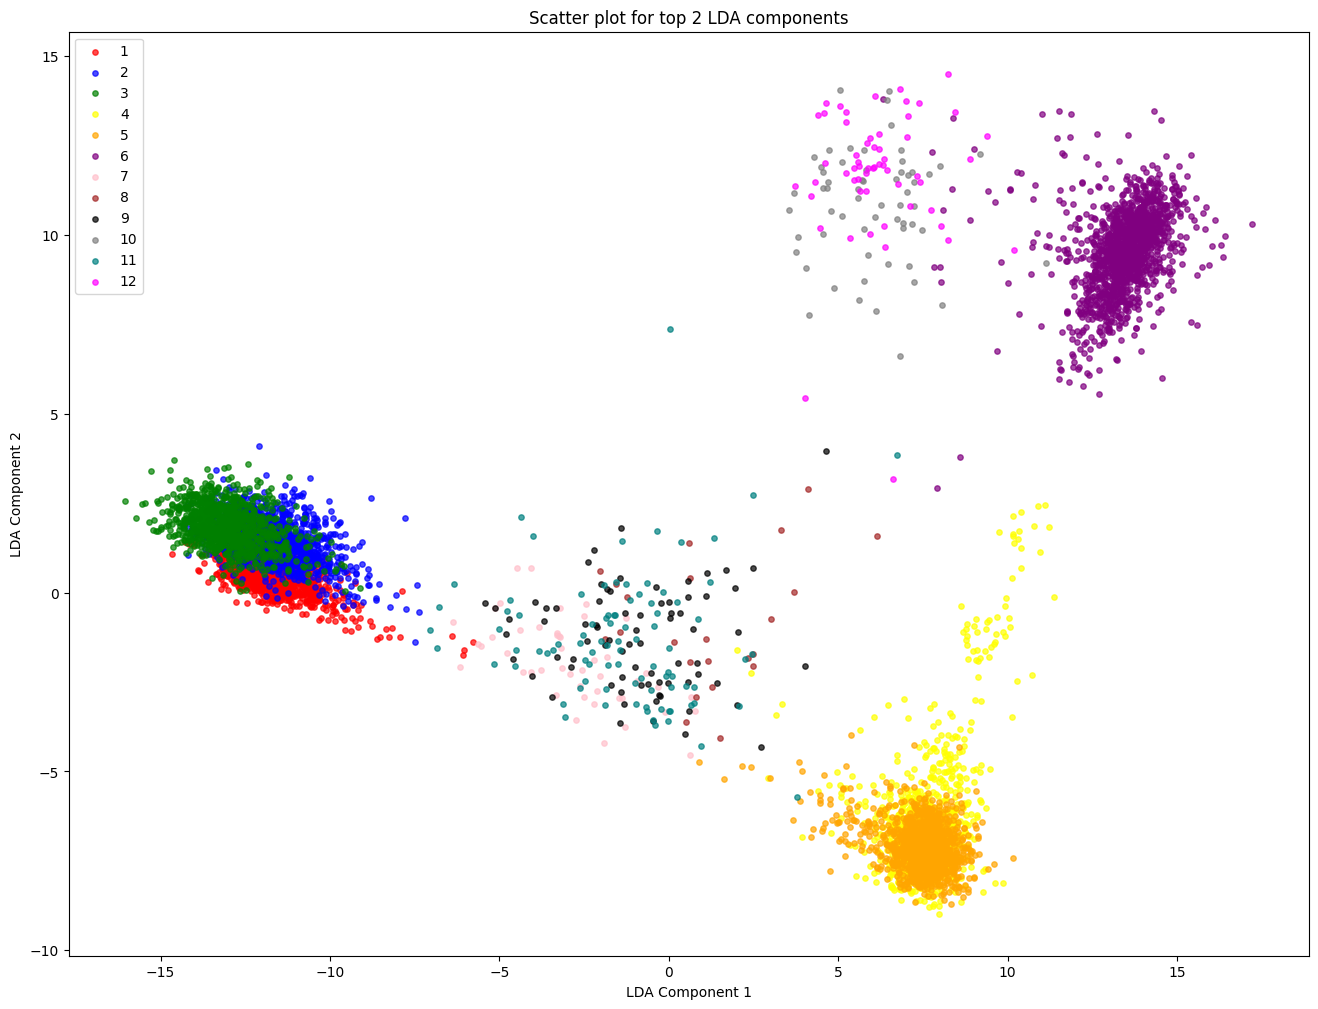

In [162]:
plt.figure(figsize=(16, 12))

for i in range (1,13):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 LDA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

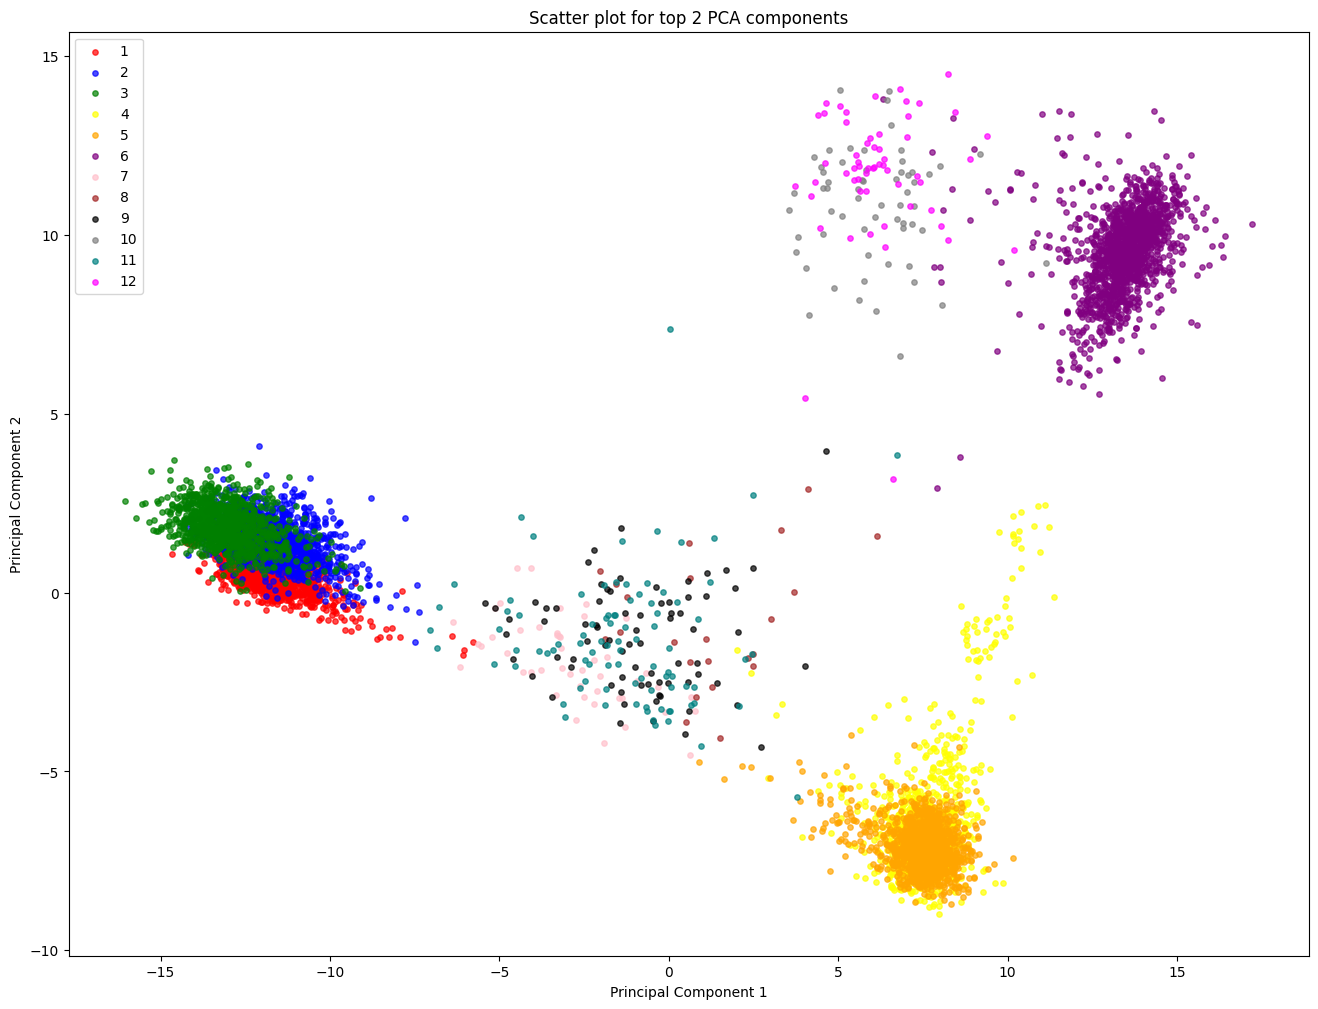

In [37]:
lda1 = LDA(n_components=8)
X_lda1 = lda1.fit_transform(X_train, y_train)
X_lda_test1 = lda1.fit_transform(X_test, y_test)
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_lda1)

plt.figure(figsize=(16, 12))

for i in range (1,13):
    plt.scatter(X_pca1[y_train == i, 0], X_pca1[y_train == i, 1], color=colors[i], label= i, s = 15,alpha=0.7)

plt.title('Scatter plot for top 2 PCA components')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [38]:
type(X_train)

numpy.ndarray

In [39]:
print(X_train.dtype)

float64


In [79]:
X_train1d = train_features.values.reshape(-1).tolist()
X_test1d = test_features.values.reshape(-1).tolist()
X_lda_tsne1d=X_lda_tsne.reshape(-1).tolist()
#X_train.tolist()

In [41]:
#X_test1d

Sequential Feature Selection

In [43]:
#  from sklearn.feature_selection import SequentialFeatureSelector
#  from sklearn.neighbors import KNeighborsClassifier
#  knn = KNeighborsClassifier(n_neighbors=3)
#  sfs = SequentialFeatureSelector(knn, n_features_to_select=12)
#  sfs.fit(X_train, y_train)
#  SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=3)
#  features=sfs.get_support()

#  sfs.transform(X_train).shape

In [61]:
X_train_sfs = X_train[:, [1,37,40,41,50,53,69,201,274,450,508,518]]
X_test_sfs = X_test[:, [1,37,40,41,50,53,69,201,274,450,508,518]]

In [62]:
X_train_sfs.shape

(7767, 12)

In [63]:
print(X_train[1].var())
print(X_train[37].var())
print(X_train[40].var())
print(X_train[41].var())
print(X_train[50].var())
print(X_train[53].var())
print(X_train[69].var())
print(X_train[201].var())
print(X_train[274].var())
print(X_train[450].var())
print(X_train[508].var())
print(X_train[518].var())

0.2889153467148654
0.3019016962737859
0.2714018033215509
0.26182771599506294
0.30104745429398233
0.3102386184595541
0.28739048244021775
0.30086044096696596
0.20631738269282976
0.29629928368798697
0.22964375126201608
0.2282686519789614


In [69]:
varr=[]
for i in range(0,561):
  v=X_train[i].var()
  varr.append(v)


In [70]:
feature_index=[]
index = list(enumerate(varr))
sort = sorted(index, key=lambda x: x[1], reverse=True)
top_10 = sort[:10]
for index, value in top_10:
    feature_index.append(index)
    print(f"Index: {index}, Value: {value}")


Index: 0, Value: 0.348251781514542
Index: 265, Value: 0.3320283401511527
Index: 73, Value: 0.3290288252399904
Index: 16, Value: 0.32880800254573894
Index: 39, Value: 0.32170019702568353
Index: 185, Value: 0.32068728637998606
Index: 34, Value: 0.3199224447588498
Index: 215, Value: 0.3188804258116586
Index: 232, Value: 0.31878489572760643
Index: 22, Value: 0.3181926796689048


In [71]:
feature_index

[0, 265, 73, 16, 39, 185, 34, 215, 232, 22]

In [72]:
X_train[0].ravel().shape

(561,)

In [73]:
X_newtrain=train_features[feature_index].values

In [74]:
X_newtrain.shape

(7767, 10)

In [75]:
X_newtrain[:,0].shape

(7767,)

<ipython-input-152-cd2f2f8fa78b>:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  stick_figure.set_data(frame, y_position)


Click the link below to download the animation:
[Download Animation](sandbox:/content/stick_figure_animation.mp4)


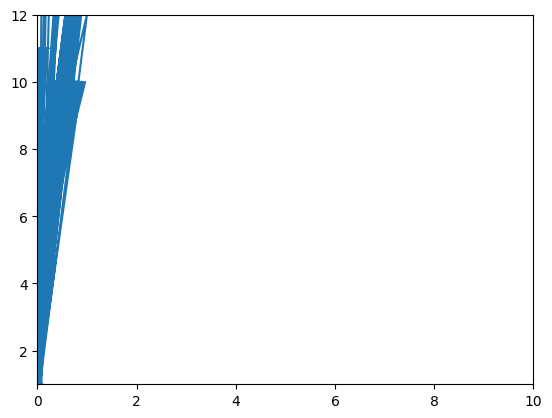

In [152]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#for i in range(0,5):
  # Create a simple graph
x = X_newtrain[:,0]
y = y_train

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, y, label='Graph')
stick_figure, = ax.plot([], [], 'ro', markersize=10, label='Stick Figure')

# Function to initialize the plot
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(1, 12)
    stick_figure.set_data([], [])
    return line, stick_figure

# Function to update the plot in each animation frame
def update(frame):
    y_position = 0.1 * frame  # Adjust the multiplier to control the motion
    stick_figure.set_data(frame, y_position)
    return stick_figure,

# Create the animation
animation = FuncAnimation(fig, update, frames=x, init_func=init, blit=True)

animation.save('stick_figure_animation.mp4', writer='ffmpeg', fps=30)
print("Click the link below to download the animation:")
print("[Download Animation](sandbox:/content/stick_figure_animation.mp4)")

# Display the animation in Google Colab
#HTML(animation.to_jshtml())

In [153]:
from google.colab import files

# Replace "paste_the_animation_link_here" with the actual link
animation_link = "stick_figure_animation.mp4"

# Download the animation file
files.download(animation_link)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
#ADF test to check whether the dataset is stationary or not
from statsmodels.tsa.stattools import adfuller

# Perform the augmented Dickey-Fuller test
result = adfuller(X_lda_tsne1d)

# Extract relevant information from the result
adf_statistic, p_value, _, _, critical_values, _ = result

# Print the results
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value:.4f}")

ADF Statistic: -15.1261
P-value: 0.0000
Critical Values:
1%: -3.4308
5%: -2.8617
10%: -2.5669


In [81]:
import statsmodels.api as sm

# Perform KPSS test
result = sm.tsa.stattools.kpss(X_train1d, regression='c')

# Interpret the output
kpss_stat, p_value, _, crit_values = result
print(f"KPSS Statistic: {kpss_stat:.5f}")
print(f"P-value: {p_value:.5f}")
print("Critical Values:", crit_values)

KPSS Statistic: 3.15898
P-value: 0.01000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-81-4a347a018148>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = sm.tsa.stattools.kpss(X_train1d, regression='c')


In [82]:
import statsmodels.api as sm

# Perform KPSS test
result = sm.tsa.stattools.kpss(X_train1d, regression='ct')

# Interpret the output
kpss_stat, p_value, _, crit_values = result
print(f"KPSS Statistic: {kpss_stat:.5f}")
print(f"P-value: {p_value:.5f}")
print("Critical Values:", crit_values)

KPSS Statistic: 0.34518
P-value: 0.01000
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


<ipython-input-82-c47995d57f9d>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = sm.tsa.stattools.kpss(X_train1d, regression='ct')


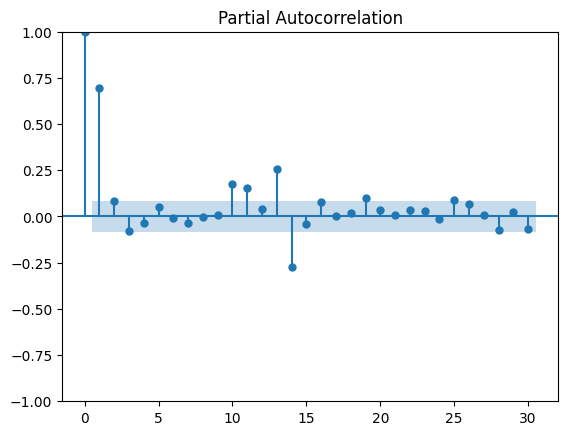

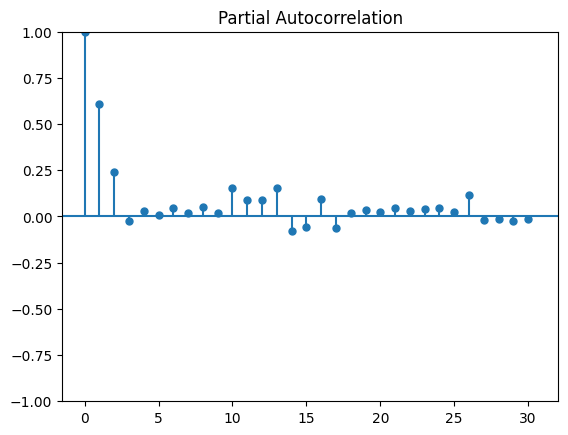

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# plot_acf(X_train)
# plt.show()

plot_pacf(X_train[25], lags=30)
plt.show()

plot_pacf(X_train1d, lags=30)
plt.show()

In [84]:
!pip install --upgrade statsmodels

In [85]:
len(X_test1d)

1773882

Coefficients: [-0.57842347  0.11376243]
Test RMSE: 0.534


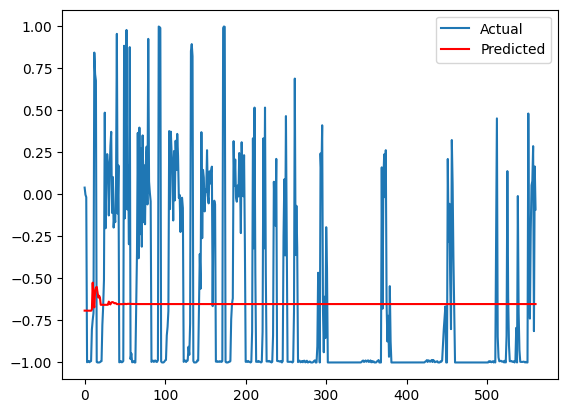

In [86]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
model = AutoReg(X_train[25], lags=[20])
model_fit = model.fit()
print(f"Coefficients: {model_fit.params}")
# Predictions
predictions = model_fit.predict(start=len(X_train[25]), end=len(X_train[25]) + len(X_test[25]) - 1, dynamic=False)

rmse = sqrt(mean_squared_error(X_test[25], predictions))
print(f"Test RMSE: {rmse:.3f}")

# # plot results
plt.plot(X_test[25], label="Actual")
plt.plot(predictions, color='red', label="Predicted")
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  561
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -272.938
Date:                Wed, 22 Nov 2023   AIC                            553.876
Time:                        07:35:35   BIC                            571.195
Sample:                             0   HQIC                           560.638
                                - 561                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6438      0.132     -4.863      0.000      -0.903      -0.384
ar.L1          0.7453      0.060     12.411      0.000       0.628       0.863
ma.L1         -0.0976      0.053     -1.831      0.0

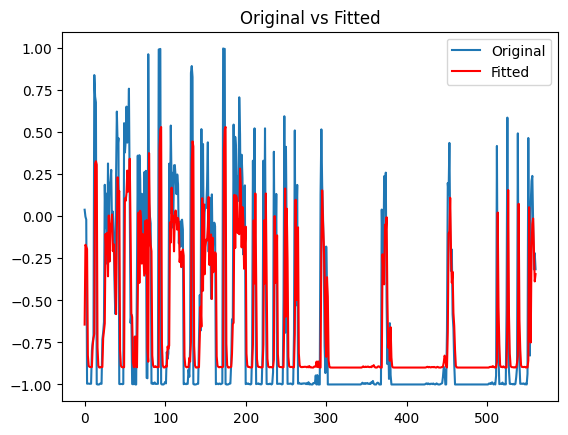

Mean Squared Error (MSE): 0.15514070387873785
Root Mean Squared Error (RMSE): 0.39387904727052675


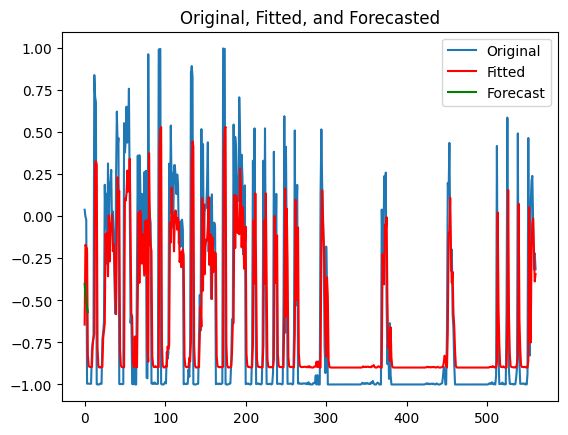

In [88]:
from statsmodels.tsa.arima.model import ARIMA
order=(1,0,1)
model = ARIMA(X_train[25], order=order)
results = model.fit()

# Summary of the model
print(results.summary())

# # Plot the residuals
# residuals = results.resid
# residuals.plot(title='Residuals')
# plt.show()

# Plot the predicted values
plt.plot(X_train[25], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('Original vs Fitted')
plt.show()

# Evaluate the model
mse = mean_squared_error(X_train[25], results.fittedvalues)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Forecast future values
# Replace 'steps' with the number of steps you want to forecast
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(X_train[25], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(forecast.predicted_mean, color='green', label='Forecast')
plt.legend()
plt.title('Original, Fitted, and Forecasted')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  561
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -268.713
Date:                Wed, 22 Nov 2023   AIC                            543.426
Time:                        07:35:16   BIC                            556.410
Sample:                             0   HQIC                           548.496
                                - 561                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6302      0.031     20.077      0.000       0.569       0.692
ma.L1         -0.9821      0.014    -67.739      0.000      -1.011      -0.954
sigma2         0.1523      0.007     21.112      0.0

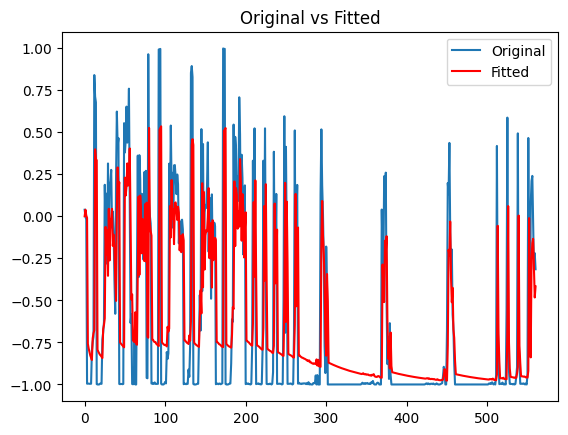

Mean Squared Error (MSE): 0.15281820689155806
Root Mean Squared Error (RMSE): 0.39091969366042184


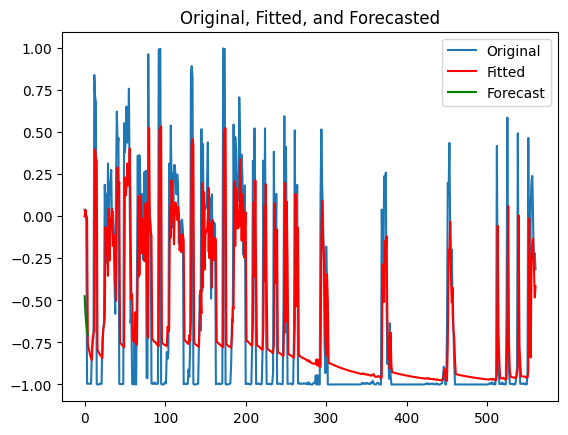

In [87]:
from statsmodels.tsa.arima.model import ARIMA
order=(1,1,1)
model = ARIMA(X_train[25], order=order)
results = model.fit()

# Summary of the model
print(results.summary())

# # Plot the residuals
# residuals = results.resid
# residuals.plot(title='Residuals')
# plt.show()

# Plot the predicted values
plt.plot(X_train[25], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('Original vs Fitted')
plt.show()

# Evaluate the model
mse = mean_squared_error(X_train[25], results.fittedvalues)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Forecast future values
# Replace 'steps' with the number of steps you want to forecast
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(X_train[25], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(forecast.predicted_mean, color='green', label='Forecast')
plt.legend()
plt.title('Original, Fitted, and Forecasted')
plt.show()

### Proposed Models On Original Data

PROPOSED MODEL 1: KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=np.arange(0,50)
k=k[k%2==1]
acc=[]
for i in k:
  # Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
  knn_classifier = KNeighborsClassifier(n_neighbors=i)

  # Train the model on your training data
  knn_classifier.fit(X_train, y_train)
  # Use the trained KNN model to predict labels for the test set
  y_pred = knn_classifier.predict(X_test)

  # Calculate the accuracy by comparing the y_pred with the y_test
  accuracy = accuracy_score(y_test, y_pred)*100
  acc.append(accuracy)


print(acc)

[86.46426312460468, 87.44465528146742, 88.48829854522454, 89.24731182795699, 88.89943074003796, 89.05755850727388, 88.83617963314357, 88.64642631246046, 88.8045540796964, 88.74130297280203, 88.86780518659077, 88.64642631246046, 88.39342188488298, 88.48829854522454, 88.33017077798861, 88.5831752055661, 88.64642631246046, 88.51992409867174, 88.29854522454143, 88.29854522454143, 88.29854522454143, 88.17204301075269, 88.01391524351676, 87.85578747628084, 87.88741302972802]


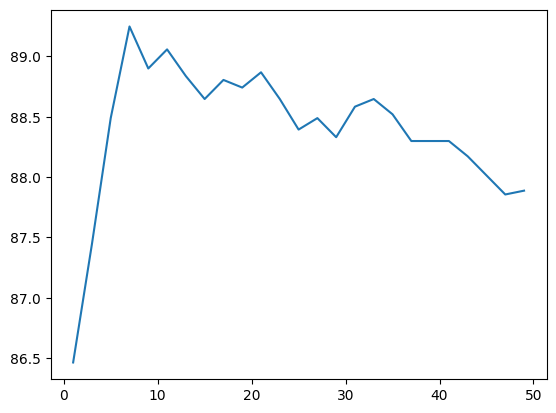

In [90]:
plt.plot(k,acc)

In [91]:
print(f'Accuracy of the ML model using KNN with (k={(2*acc.index(max(acc)))+1}): {round(max(acc),2)}%')

Accuracy of the ML model using KNN with (k=7): 89.25%


PROPOSED MODEL 2: LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [93]:
lr_classifier = LogisticRegression(max_iter=7777)
lr_classifier.fit(X_train , y_train)
y_pred = lr_classifier.predict(X_test)
lr_model_accuracy =  accuracy_score(y_test,y_pred)
print(f'Accurarcy of the ML model using Logistic Regression: {round((lr_model_accuracy)*100,2)}%')

Accurarcy of the ML model using Logistic Regression: 94.56%


In [94]:
lr_classifier = LogisticRegression(max_iter=7777)
lr_classifier.fit(X_lda_tsne , y_train)
y_pred = lr_classifier.predict(X_lda_tsne_test)
lr_model_accuracy =  accuracy_score(y_test,y_pred)
print(f'Accurarcy of the ML model using Logistic Regression: {round((lr_model_accuracy)*100,2)}%')

Accurarcy of the ML model using Logistic Regression: 0.51%


PROPOSED MODEL 3: SVM

In [95]:
from sklearn import svm

In [96]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_3 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_3)
print(f"Accuracy of the ML model using SVM (linear kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (linear kernel): 95.193%


In [97]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_4 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_4)
print(f"Accuracy of the ML model using SVM (RBF kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (RBF kernel): 93.675%


In [98]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred_5 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_5)
print(f"Accuracy of the ML model using SVM (Poly kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (Poly kernel): 94.56%


PROPOSED MODEL 4: DECISION TREE CLASSIFIER

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train , y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_model_accuracy =  accuracy_score(y_test , y_pred_dt)
print(f'Accurarcy of the ML model using Decision Tree classifier : {round((dt_model_accuracy)*100 , 2)}%')

Accurarcy of the ML model using Decision Tree classifier : 80.42%


PROPOSED MODEL 5: Multi-Layer Perceptron

In [101]:
from sklearn.neural_network import MLPClassifier

In [102]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ML model using Multi layer Perceptron: {round(accuracy*100,2)}%")

Accuracy of the ML model using Multi layer Perceptron: 94.12%


In [103]:
mlp = MLPClassifier()
mlp.fit(X_lda_tsne, y_train)
y_pred = mlp.predict(X_lda_tsne_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ML model using Multi layer Perceptron: {round(accuracy*100,2)}%")

Accuracy of the ML model using Multi layer Perceptron: 1.01%


PROPOSED MODEL 6: RANDOM FOREST CLASSIFIER

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ML model using Random Forest Classifier: {round(accuracy*100,2)}%")

Accuracy of the ML model using Random Forest Classifier: 91.43%


### Proposed Models on SFS data

PROPOSED MODEL 1: KNN

In [106]:
k=np.arange(0,50)
k=k[k%2==1]
acc=[]
for i in k:
  # Create a KNN classifier (you can specify the number of neighbors, e.g., n_neighbors=5)
  knn_classifier = KNeighborsClassifier(n_neighbors=i)

  # Train the model on your training data
  knn_classifier.fit(X_train_sfs, y_train)
  # Use the trained KNN model to predict labels for the test set
  y_pred = knn_classifier.predict(X_test_sfs)

  # Calculate the accuracy by comparing the y_pred with the y_test
  accuracy = accuracy_score(y_test, y_pred)*100
  acc.append(accuracy)


print(acc)

[85.35736875395318, 87.0651486401012, 87.19165085388994, 87.53953194180897, 87.22327640733712, 87.34977862112588, 87.31815306767868, 86.93864642631246, 87.38140417457305, 87.00189753320683, 87.00189753320683, 87.16002530044275, 87.12839974699558, 87.12839974699558, 86.90702087286527, 86.90702087286527, 86.97027197975964, 87.09677419354838, 86.81214421252372, 86.87539531941809, 86.8437697659709, 86.97027197975964, 87.03352308665401, 86.8437697659709, 86.59076533839342]


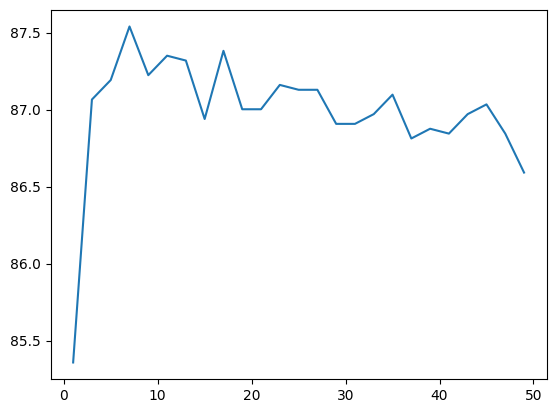

In [107]:
plt.plot(k,acc)

In [108]:
print(f'Accuracy of the ML model using KNN with (k={(2*acc.index(max(acc)))+1}): {round(max(acc),2)}%')

Accuracy of the ML model using KNN with (k=7): 87.54%


PROPOSED MODEL 2: LOGISTIC REGRESSION

In [109]:
lr_classifier = LogisticRegression(max_iter=7777)
lr_classifier.fit(X_train_sfs , y_train)
y_pred = lr_classifier.predict(X_test_sfs)
lr_model_accuracy =  accuracy_score(y_test,y_pred)
print(f'Accurarcy of the ML model using Logistic Regression: {round((lr_model_accuracy)*100,2)}%')

Accurarcy of the ML model using Logistic Regression: 86.18%


PROPOSED MODEL 3: SVM

In [110]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sfs, y_train)
y_pred_3 = clf.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred_3)
print(f"Accuracy of the ML model using SVM (linear kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (linear kernel): 87.54%


In [111]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_sfs, y_train)
y_pred_4 = clf.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred_4)
print(f"Accuracy of the ML model using SVM (RBF kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (RBF kernel): 88.204%


In [112]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train_sfs, y_train)
y_pred_5 = clf.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred_5)
print(f"Accuracy of the ML model using SVM (Poly kernel): {round(accuracy*100,3)}%")

Accuracy of the ML model using SVM (Poly kernel): 88.362%


PROPOSED MODEL 4: DECISION TREE CLASSIFIER

In [113]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_sfs , y_train)
y_pred_dt = dt_classifier.predict(X_test_sfs)
dt_model_accuracy =  accuracy_score(y_test , y_pred_dt)
print(f'Accurarcy of the ML model using Decision Tree classifier : {round((dt_model_accuracy)*100 , 2)}%')

Accurarcy of the ML model using Decision Tree classifier : 80.39%


PROPOSED MODEL 5: Multi-Layer Perceptron

In [114]:
mlp = MLPClassifier()
mlp.fit(X_train_sfs, y_train)
y_pred = mlp.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ML model using Multi layer Perceptron: {round(accuracy*100,2)}%")

Accuracy of the ML model using Multi layer Perceptron: 87.73%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


PROPOSED MODEL 6: RANDOM FOREST CLASSIFIER

In [115]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_sfs, y_train)
y_pred = rf_classifier.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ML model using Random Forest Classifier: {round(accuracy*100,2)}%")

Accuracy of the ML model using Random Forest Classifier: 86.5%


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -6.283
Date:                Wed, 22 Nov 2023   AIC                             18.565
Time:                        07:48:14   BIC                             19.759
Sample:                             0   HQIC                            17.813
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7870      1.945     -0.405      0.686      -4.599       3.025
ma.L1          0.9958     38.305      0.026      0.979     -74.081      76.072
sigma2         0.1703      6.298      0.027      0.9

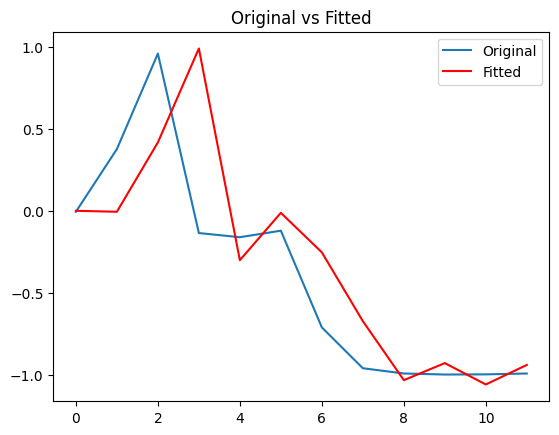

Mean Squared Error (MSE): 0.17075681195540718
Root Mean Squared Error (RMSE): 0.41322731269291385


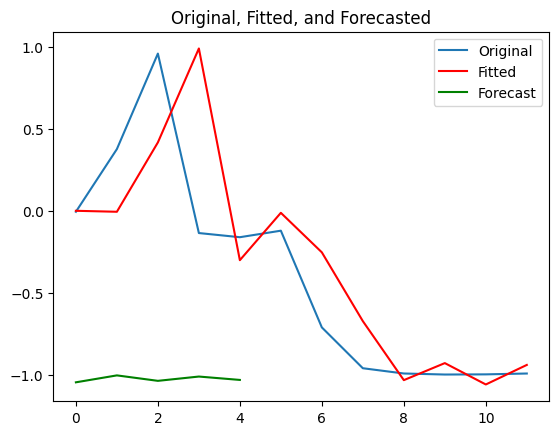

In [119]:
from statsmodels.tsa.arima.model import ARIMA
order=(1,1,1)
model = ARIMA(X_train_sfs[0], order=order)
results = model.fit()

# Summary of the model
print(results.summary())

# # Plot the residuals
# residuals = results.resid
# residuals.plot(title='Residuals')
# plt.show()

# Plot the predicted values
plt.plot(X_train_sfs[0], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('Original vs Fitted')
plt.show()

# Evaluate the model
mse = mean_squared_error(X_train_sfs[0], results.fittedvalues)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Forecast future values
# Replace 'steps' with the number of steps you want to forecast
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(X_train_sfs[0], label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.plot(forecast.predicted_mean, color='green', label='Forecast')
plt.legend()
plt.title('Original, Fitted, and Forecasted')
plt.show()

In [140]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [141]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',  # Multiclass classification
    'num_class': 13,  # Number of classes in the target variable
    'metric': 'multi_logloss',  # Logarithmic loss metric
    'max_depth': 3,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'n_estimators': 100
}
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])
y_pred_prob = model.predict(X_test)
y_pred = [np.argmax(pred) for pred in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.207749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140169
[LightGBM] [Info] Number of data points in the train set: 7767, number of used features: 561
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.846127
[LightGBM] [Info] Start training from score -1.979426
[LightGBM] [Info] Start training from score -2.062969
[LightGBM] [Info] Start training from score -1.792919
[LightGBM] [Info] Start training from score -1.697117
[LightGBM] [Info] Start training from score -1.704169
[LightGBM] [Info] Start training from score -5.107492
[LightGBM] [Info] Start training from score -5.822145
[LightGBM] [Info] Start training from score -4.640151
[LightGBM] [Info] Start training from score -4.863295
[LightGBM] [Info] Start training from score -4.457830
[LightGBM] [Info] Start training from score -4.914588
[Light

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
train_data = lgb.Dataset(X_train_sfs, label=y_train)
test_data = lgb.Dataset(X_test_sfs, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',  # Multiclass classification
    'num_class': 13,  # Number of classes in the target variable
    'metric': 'multi_logloss',  # Logarithmic loss metric
    'max_depth': 3,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'n_estimators': 100
}
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])
y_pred_prob = model.predict(X_test_sfs)
y_pred = [np.argmax(pred) for pred in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2829
[LightGBM] [Info] Number of data points in the train set: 7767, number of used features: 12
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.846127
[LightGBM] [Info] Start training from score -1.979426
[LightGBM] [Info] Start training from score -2.062969
[LightGBM] [Info] Start training from score -1.792919
[LightGBM] [Info] Start training from score -1.697117
[LightGBM] [Info] Start training from score -1.704169
[LightGBM] [Info] Start training from score -5.107492
[LightGBM] [Info] Start training from score -5.822145
[LightGBM] [Info] Start training from score -4.640151
[LightGBM] [Info] Start training from score -4.863295
[LightGBM] [Info] Start training from score -4.457830
[LightGBM] [Info] Start training from score -4.914588
[LightGBM

In [144]:
import xgboost as xgb

In [145]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 13,  # Number of classes in the target variable
    'eval_metric': 'mlogloss',  # Logarithmic loss metric
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:04:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1568627450980392


In [146]:
dtrain = xgb.DMatrix(X_train_sfs, label=y_train)
dtest = xgb.DMatrix(X_test_sfs, label=y_test)

# Set hyperparameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 13,  # Number of classes in the target variable
    'eval_metric': 'mlogloss',  # Logarithmic loss metric
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:05:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.1568627450980392
